# Milestone 1 Assignment

## Houda Aynaou

The capstone project focuses on diaper manufacturing quality. In the [article](http://www.madehow.com/Volume-3/Disposable-Diaper.html), you discovered how the diaper manufacturing process works. Generally, to ensure or predict quality, a diaper manufacturer needs to monitor every step of the manufacturing process with sensors such as heat sensors, glue sensors, glue level, etc.

For this capstone project, we will use the [SECOM manufacturing Data Set](https://archive.ics.uci.edu/ml/datasets/SECOM) from the UCI Machine Learning Repository. The set is originally for semiconductor manufacturing, but in our case, we will assume that it is for the diaper manufacturing process.


## To Do
1. Refine your data understanding and prepare a DFD of solving the manufacturing quality problem
2. Read and merge data
3. Clean and prepare data 
4. Visually explore data
5. Handle class imbalance problem
6. Apply feature selection techniques to reduce dimensionality of data
7. What are your initial findings? Describe them in a summary section

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Read and merge data

In [3]:
# Secom data
LINK = 'https://raw.githubusercontent.com/houdaaynaou/DS-Certificate-UW/master/Course%203%20Machine%20Learning%20Techniques/Data/secom.csv'
secom_data = pd.read_csv(LINK,header= None, delimiter= ' ')
secom_data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [4]:
# Secom labels
LINK2 = 'https://raw.githubusercontent.com/houdaaynaou/DS-Certificate-UW/master/Course%203%20Machine%20Learning%20Techniques/Data/secom_labels.csv'
secom_labels = pd.read_csv(LINK2, header= None, parse_dates=[1], names= ['Class', 'Time Stamp'])
secom_labels.head()

,Class,Time Stamp
0,-1,2008-07-19 11:55:00
1,-1,2008-07-19 12:32:00
2,1,2008-07-19 13:17:00
3,-1,2008-07-19 14:43:00
4,-1,2008-07-19 15:22:00


In [5]:
# mergine data

data = pd.concat([secom_labels, secom_data], axis= 1)
data.head(10)

,Class,Time Stamp,0,1,2,3,4,5,6,7,...,580,581,582,583,584,585,586,587,588,589
0,-1,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,-1,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,-1,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,-1,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,-1,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,-1,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Class to 589
dtypes: datetime64[ns](1), float64(590), int64(1)
memory usage: 7.1 MB


# 2. Clean and prepare data

In [7]:
missing = data.isnull().sum().sort_values(ascending = False).to_frame(name = 'Total missing')

# Columns with missing values
col_missing = missing[missing['Total missing'] != 0]
col_missing['% missing'] = (col_missing['Total missing']/len(data))*100
print('There are {} columns with missing values.'.format(col_missing.shape[0]))
col_missing.head()

There are 538 columns with missing values.


,Total missing,% missing
293,1429,91.193363
158,1429,91.193363
157,1429,91.193363
292,1429,91.193363
358,1341,85.577537


In [8]:
# columns where more than 50 % of the data is missing
print('Number of columns where more than 50% missing data', col_missing[col_missing['% missing'] > 50].shape[0])

print('\nList of columns where more than 50% missing data:\n',list(col_missing[col_missing['% missing'] > 50].index))



Number of columns where more than 50% missing data 28

List of columns where more than 50% missing data:
 [293, 158, 157, 292, 358, 220, 492, 85, 244, 111, 518, 109, 384, 383, 382, 110, 246, 245, 516, 517, 581, 578, 579, 580, 346, 73, 72, 345]


In [9]:
# Dropping columns where more than 70 of the data is missing
to_drop = list(col_missing[col_missing['% missing'] > 70].index)

d_data = data.drop(to_drop, axis= 1)

d_data.shape

(1567, 584)

In [10]:
# Impute missing value with the mean
df = d_data.fillna(data.mean(axis =1))
df.head()

,Class,Time Stamp,0,1,2,3,4,5,6,7,...,580,581,582,583,584,585,586,587,588,589
0,-1,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,81.399372,72.628602,0.5005,0.0118,0.0035,2.3630,69.759871,82.904667,91.517791,71.129541
1,-1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,-1,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,-1,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,81.399372,72.628602,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


# 3. Visually explore data

In [55]:
# Target variable:
df['Class'].value_counts()

-1    1463
 1     104
Name: Class, dtype: int64

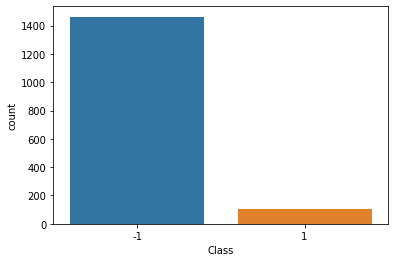

In [56]:
 sns.countplot(x="Class", data=df); 

The plot shows that the data is imbalanced.

In [57]:
# Correlation 
corr = df.corr()
corr

,Class,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
Class,1.000000,0.005903,-0.019598,0.024910,-0.016782,-0.016590,0.025315,0.024959,-0.020240,-0.008948,...,-0.020898,-0.008677,-0.006682,-0.006688,-0.006732,0.000397,-0.006708,-0.006589,-0.006699,-0.002602
0,0.005903,1.000000,-0.049243,0.007878,0.009356,-0.002108,0.009024,0.001657,-0.005593,-0.008944,...,0.063351,-0.004208,-0.011841,-0.011675,-0.011821,0.009462,0.003892,0.003599,0.003582,0.021529
1,-0.019598,-0.049243,1.000000,-0.030958,0.006176,0.005900,-0.030657,-0.023132,0.029232,-0.013291,...,-0.026593,0.039675,0.007819,0.007896,0.007868,0.007715,0.010990,0.011220,0.011103,0.044994
2,0.024910,0.007878,-0.030958,1.000000,0.311580,-0.100625,0.989479,0.375003,-0.524149,0.003533,...,-0.056981,0.013943,0.003244,0.003240,0.003276,-0.001580,0.000889,0.000749,0.000768,-0.030552
3,-0.016782,0.009356,0.006176,0.311580,1.000000,-0.087433,0.272843,-0.497121,-0.158498,0.047067,...,-0.078583,-0.048998,-0.010069,-0.009885,-0.010050,0.013636,0.001742,0.001309,0.001429,-0.084412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.000397,0.009462,0.007715,-0.001580,0.013636,-0.001511,-0.004016,-0.015621,0.014735,0.002359,...,0.003121,-0.001066,0.559850,0.566844,0.560810,1.000000,-0.004453,-0.004556,-0.004504,-0.013414
586,-0.006708,0.003892,0.010990,0.000889,0.001742,-0.001869,0.002536,-0.012332,-0.002023,-0.000751,...,0.020320,-0.006403,-0.000607,-0.000653,-0.000613,-0.004453,1.000000,0.999972,0.999976,-0.011093
587,-0.006589,0.003599,0.011220,0.000749,0.001309,-0.001675,0.002387,-0.011995,-0.001960,-0.000703,...,0.020256,-0.003333,-0.000746,-0.000792,-0.000752,-0.004556,0.999972,1.000000,0.999995,-0.006038
588,-0.006699,0.003582,0.011103,0.000768,0.001429,-0.001578,0.002393,-0.012087,-0.001909,-0.000663,...,0.020353,-0.004158,-0.000667,-0.000713,-0.000672,-0.004504,0.999976,0.999995,1.000000,-0.007199


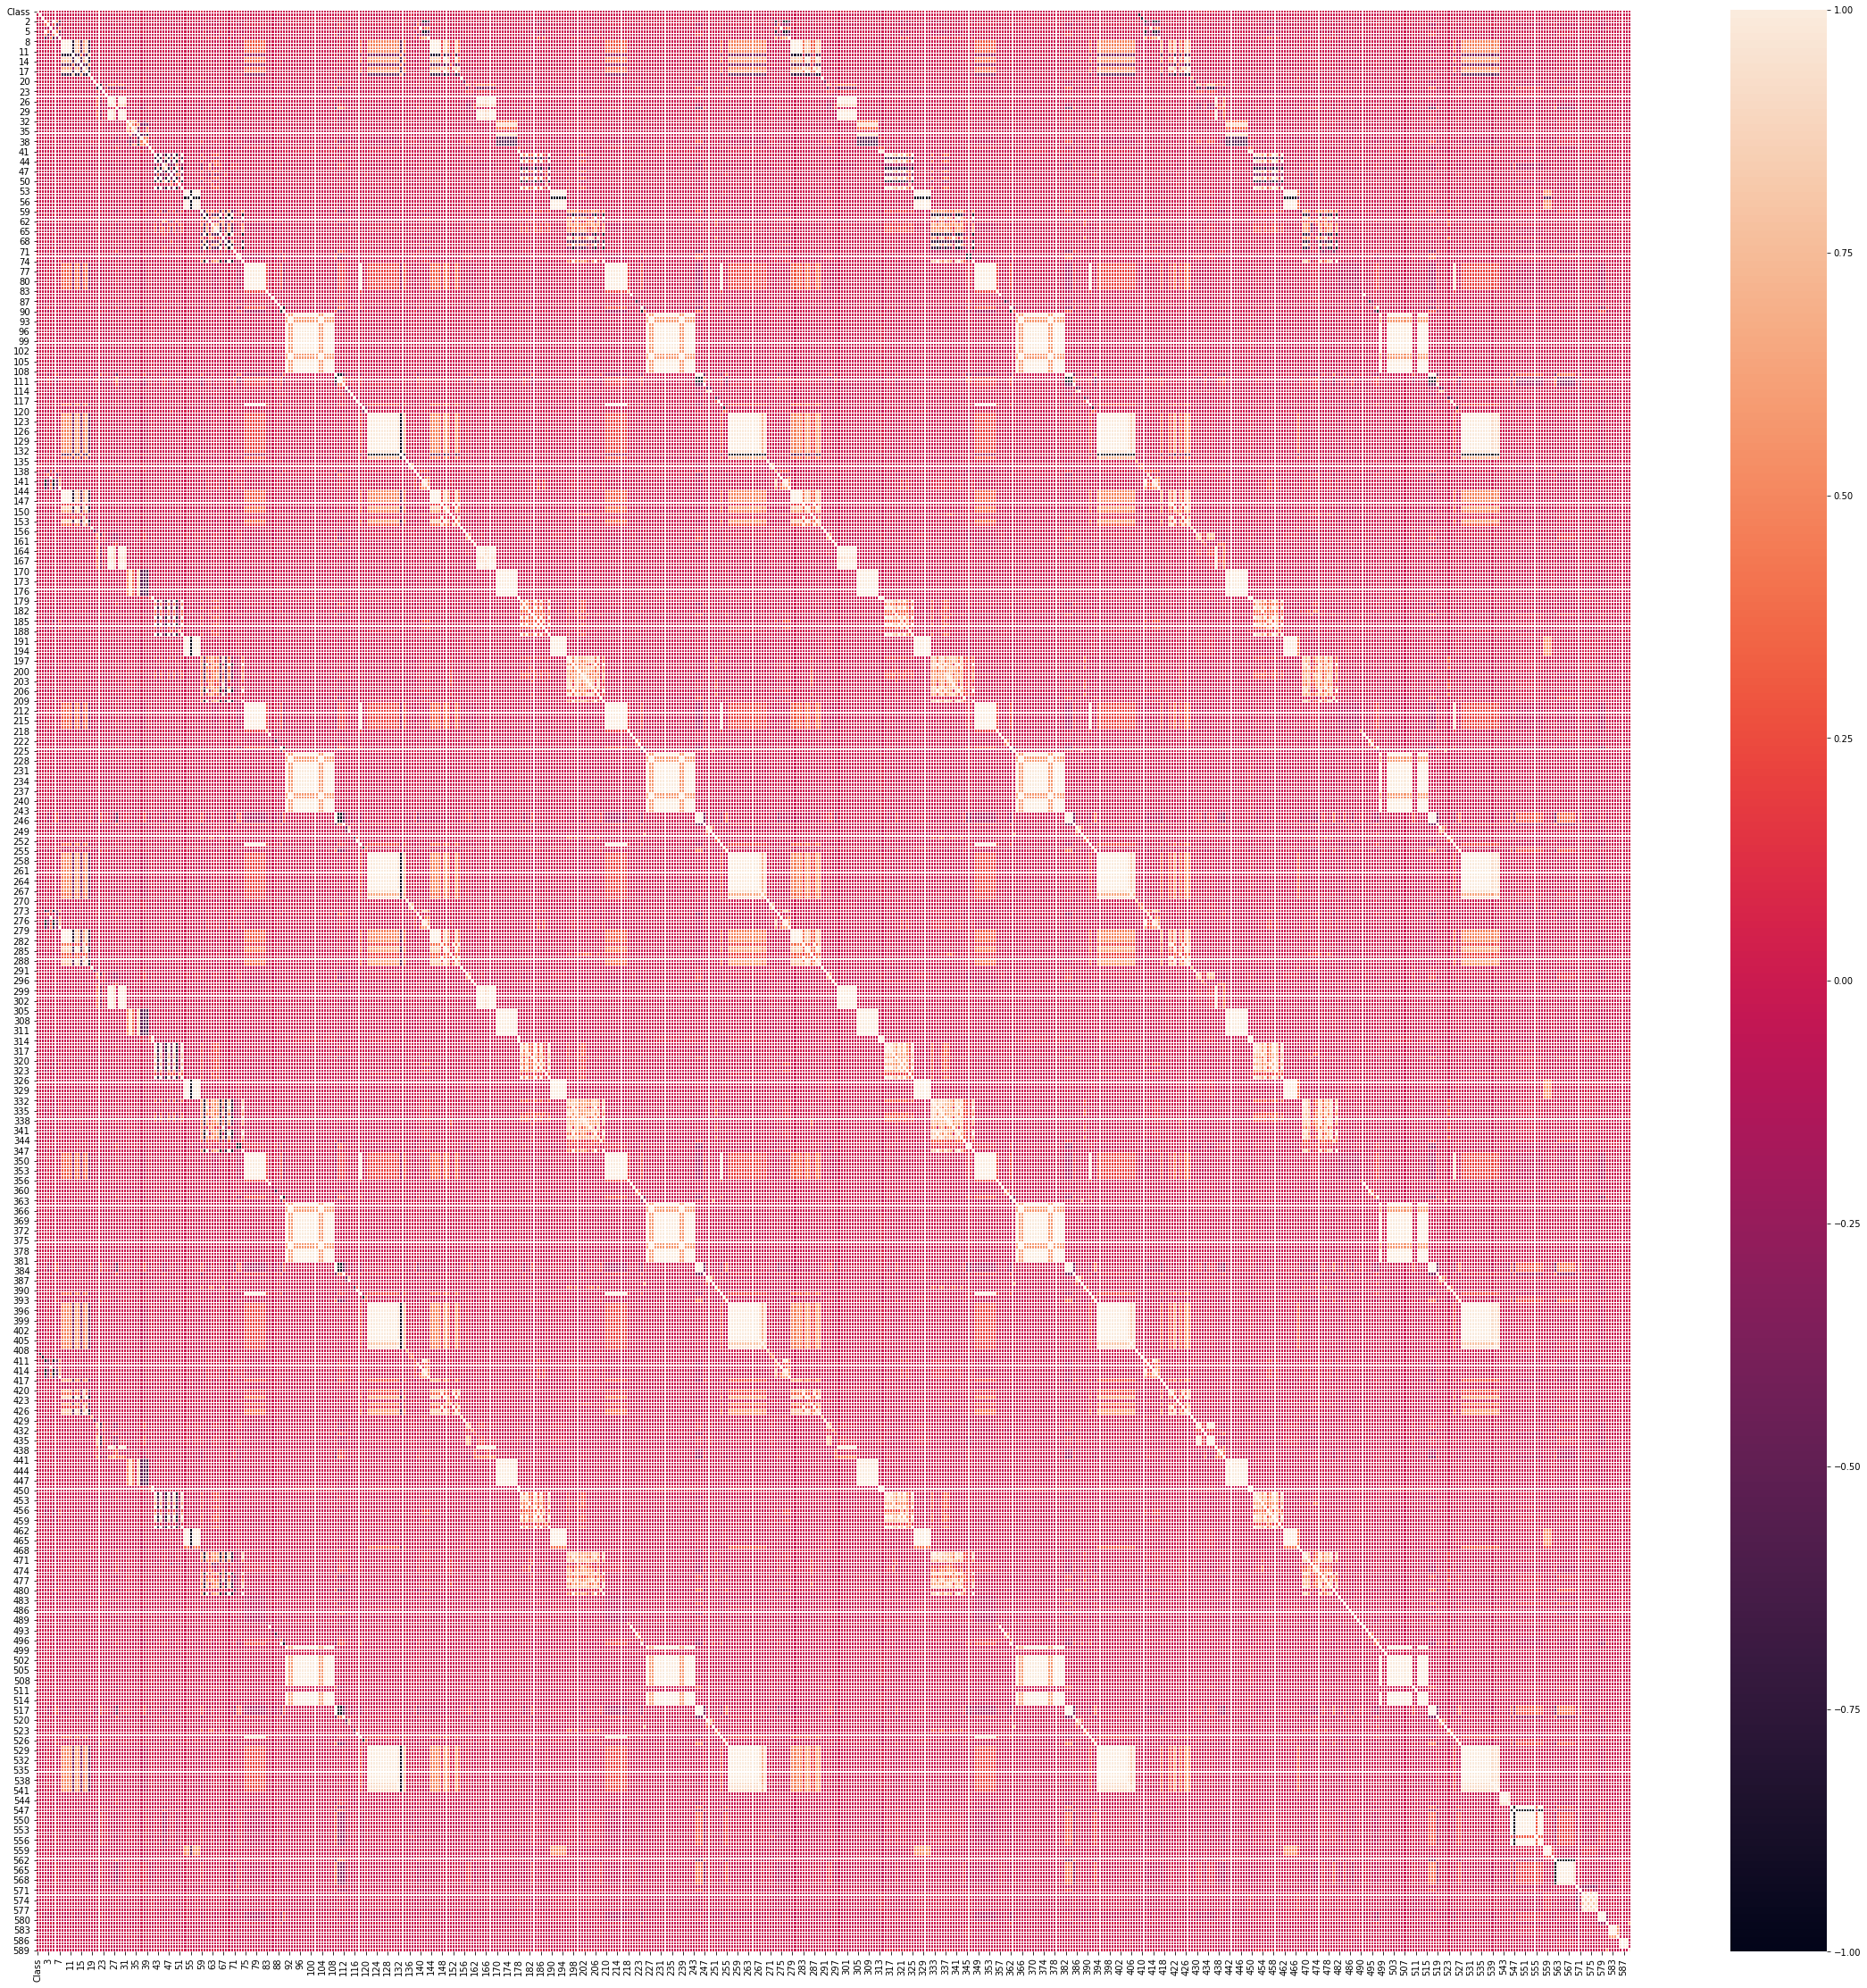

In [58]:
# Correlation heatmap:
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(), linewidths=.05, ax = ax);
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler

x = df.drop(['Class', 'Time Stamp'], axis= 1)
y= df['Class']
scaler = StandardScaler()
scaler.fit(x)
scaler.transform(x)


array([[ 1.41546096e-01,  4.37359596e-01,  3.08298605e-02, ...,
         3.95723680e+01,  3.95726875e+01, -3.03963215e-01],
       [ 4.72415824e-01, -1.10021195e-01,  2.41101189e-01, ...,
        -2.35379179e-02, -2.49598098e-02,  1.15684911e+00],
       [-3.60090166e-01,  4.14879665e-01,  2.43171429e-02, ...,
        -1.00183426e-02, -2.11520022e-02, -1.78949193e-01],
       ...,
       [-1.24374184e-01, -5.82653446e-01,  1.22283252e-01, ...,
        -2.90317383e-02, -2.64742788e-02, -5.98165954e-01],
       [-5.52387468e-01,  2.60233241e-01, -2.18747820e-02, ...,
        -2.14359345e-02, -2.43107517e-02, -6.56233736e-02],
       [-2.97283592e-01, -1.89642232e-01,  6.88121753e-02, ...,
        -2.54010396e-02, -2.56088679e-02,  4.06379801e-01]])

# 4. Handling Class imbalance


In [61]:
from sklearn.preprocessing import StandardScaler

x = df.drop(['Class', 'Time Stamp'], axis= 1)
y= df['Class']
scaler = StandardScaler()
scaler.fit(x)
x_standarised = pd.DataFrame(scaler.transform(x), columns= x.columns)
x_standarised.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.141546,0.437360,0.030830,0.058187,-0.061219,0.094946,-0.479672,-0.075516,-0.025159,-0.028958,...,0.806977,-0.177287,-0.025129,-0.026955,-0.025356,-0.177453,39.571745,39.572368,39.572687,-0.303963
1,0.472416,-0.110021,0.241101,0.173165,-0.070620,0.094946,0.219624,-0.075413,-0.026256,-0.035612,...,-1.239178,2.231067,-0.024639,-0.021922,-0.024858,0.304854,-0.032002,-0.023538,-0.024960,1.156849
2,-0.360090,0.414880,0.024317,0.686083,-0.058562,0.094946,-0.793912,-0.075537,-0.041156,-0.033779,...,-1.238956,0.004466,-0.026772,-0.025086,-0.025257,0.010563,-0.004294,-0.010018,-0.021152,-0.178949
3,-0.073813,-0.028296,0.086490,-1.039043,-0.061924,0.094946,0.499549,-0.076029,-0.028617,-0.040354,...,-1.239218,-0.155711,-0.025653,-0.027674,-0.025606,-0.248952,-0.025984,-0.026022,-0.025652,-0.275044
4,0.148230,0.098887,0.255605,-0.126984,-0.058152,0.094946,-0.068167,-0.075660,-0.024428,-0.036648,...,0.806977,-0.177287,-0.032298,0.195860,-0.000171,22.282531,-0.025984,-0.026022,-0.025652,-0.275044


In [62]:
# Split the data: 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standarised, 
                                                    y, 
                                                    test_size = 0.20, 
                                                    random_state = 0)



In [63]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification


# Over sampling with SMOTE 
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(x_train, y_train.ravel())

# Balanced Classes 
np.unique(y_train_new, return_counts= True)

(array([-1,  1]), array([1162, 1162]))

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(X_train_new, y_train_new)

# prediction for Testing data
test_pred_sm = lr.predict(x_test)

# accuracy 
sm_score = accuracy_score(y_test, test_pred_sm)

print('Accuracy score on testing data after balancing classes:', sm_score)

Accuracy score on testing data after balancing classes: 0.7961783439490446


In [65]:
cm = confusion_matrix(y_test, test_pred_sm)
cm

array([[247,  54],
       [ 10,   3]])

Out of the 301 observations from **class -1** 247 where correctly classified, and only 3 where correctly classified from **Class 1**. Although columns with more than 70% missing values were dropped, more feaure extractions is needed to improve model performance.



# 5. Feature selection techniques to reduce dimensionality of data

## 5.1. Embedded methods: Lasso regularisation

In [66]:
# Lasso Regularisation

from sklearn import linear_model

# Logistic regression with Lasso regression
lasso_lr = linear_model.LogisticRegression(penalty='l2')
lasso_lr.fit(x_train, y_train)

lasso_lr_pred = lasso_lr.predict(x_test)

# coeff
lasso_lr_coef = pd.DataFrame({'col': x_train.columns, 'coef': lasso_lr.coef_.ravel()})

# features selected and coefficient
ft_selecled = lasso_lr_coef[lasso_lr_coef['coef']>0]
print('list of variables kept by Lasso:')
ft_selecled.head()


list of variables kept by Lasso:


,col,coef
4,4,0.094253
7,7,0.122527
8,8,0.091848
9,9,0.067184
10,10,0.082582


In [67]:
print('Lasso regression reduced the variables to 313')

Lasso regression reduced the variables to 313


In [68]:
# accuracy 
lasso_score = accuracy_score(y_test, lasso_lr_pred)
print('Accuracy score on testing data with Lasso regularization:', lasso_score)

Accuracy score on testing data with Lasso regularization: 0.9044585987261147


In [69]:
# confusion metric

lr_cm = confusion_matrix(y_test, lasso_lr_pred)
lr_cm

array([[283,  18],
       [ 12,   1]])

Lasso regularisation performed better in terms of accuracy, and was able to correctly classify 283 out of 301 from **class -1** but performed poorly in terms of classifying **Class 1**.



## 5.2. Wrapper methods: Recursive Feature Elimination

In [70]:
# Backwards selection with RFE with default parameters
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
back_selector = RFE(estimator, step = 1, verbose = True) 
back_selector = back_selector.fit(x_train, y_train)

Fitting estimator with 582 features.
Fitting estimator with 581 features.
Fitting estimator with 580 features.
Fitting estimator with 579 features.
Fitting estimator with 578 features.
Fitting estimator with 577 features.
Fitting estimator with 576 features.
Fitting estimator with 575 features.
Fitting estimator with 574 features.
Fitting estimator with 573 features.
Fitting estimator with 572 features.
Fitting estimator with 571 features.
Fitting estimator with 570 features.
Fitting estimator with 569 features.
Fitting estimator with 568 features.
Fitting estimator with 567 features.
Fitting estimator with 566 features.
Fitting estimator with 565 features.
Fitting estimator with 564 features.
Fitting estimator with 563 features.
Fitting estimator with 562 features.
Fitting estimator with 561 features.
Fitting estimator with 560 features.
Fitting estimator with 559 features.
Fitting estimator with 558 features.
Fitting estimator with 557 features.
Fitting estimator with 556 features.
F

Fitting estimator with 360 features.
Fitting estimator with 359 features.
Fitting estimator with 358 features.
Fitting estimator with 357 features.
Fitting estimator with 356 features.
Fitting estimator with 355 features.
Fitting estimator with 354 features.
Fitting estimator with 353 features.
Fitting estimator with 352 features.
Fitting estimator with 351 features.
Fitting estimator with 350 features.
Fitting estimator with 349 features.
Fitting estimator with 348 features.
Fitting estimator with 347 features.
Fitting estimator with 346 features.
Fitting estimator with 345 features.
Fitting estimator with 344 features.
Fitting estimator with 343 features.
Fitting estimator with 342 features.
Fitting estimator with 341 features.
Fitting estimator with 340 features.
Fitting estimator with 339 features.
Fitting estimator with 338 features.
Fitting estimator with 337 features.
Fitting estimator with 336 features.
Fitting estimator with 335 features.
Fitting estimator with 334 features.
F

The backward selection run started with 582 features, but ended with half of them, throwing out one feature at every step.

In [71]:
# The mask of selected features:

selected_findices = back_selector.get_support(indices=True)
rfe_selected_features = list(x_train.iloc[:, back_selector.get_support(indices=True)].columns)

print('List of selected features names:')
rfe_selected_features

List of selected features names:


[1,
 2,
 3,
 4,
 7,
 8,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 39,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 55,
 58,
 59,
 60,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 80,
 84,
 86,
 89,
 90,
 98,
 99,
 102,
 108,
 110,
 113,
 114,
 115,
 117,
 119,
 121,
 122,
 125,
 126,
 127,
 129,
 133,
 134,
 135,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 148,
 149,
 151,
 153,
 159,
 161,
 164,
 165,
 166,
 167,
 168,
 169,
 172,
 173,
 174,
 176,
 177,
 179,
 183,
 184,
 186,
 188,
 189,
 195,
 196,
 197,
 198,
 199,
 201,
 203,
 204,
 205,
 207,
 208,
 214,
 215,
 218,
 219,
 221,
 223,
 224,
 225,
 245,
 248,
 249,
 250,
 254,
 255,
 266,
 268,
 269,
 271,
 272,
 273,
 274,
 275,
 277,
 278,
 282,
 283,
 284,
 286,
 288,
 289,
 291,
 294,
 296,
 300,
 302,
 303,
 304,
 307,
 308,
 309,
 310,
 311,
 312,
 315,
 316,
 317,
 318,
 319,
 320,
 322,
 324,
 325,
 332,
 333,
 334,
 335,
 336,
 338,
 339,
 340,
 341,
 3

In [72]:
rfe_pred = back_selector.predict(x_test)

# accuracy 
rfe_score = accuracy_score(y_test, rfe_pred)
print('Accuracy score on testing data RFE:', rfe_score)

Accuracy score on testing data RFE: 0.8949044585987261


In [73]:
# confusion metric

rfe_cm = confusion_matrix(y_test, rfe_pred)
rfe_cm

array([[280,  21],
       [ 12,   1]])

Recursive Feature Elimination performed fairly well in terms of accuracy comparing with SMOTE. Also it correctly classify 280 out of 301 from class -1 but performed poorly in terms of classifying Class 1.

## 5.3. Lasso regression on SMOTE

In [74]:
# Logistic regression with Lasso regression

lasso_sm = linear_model.LogisticRegression(penalty='l2')
lasso_sm.fit(X_train_new, y_train_new)

lasso_sm_pred = lasso_sm.predict(x_test)

# coeff
lasso_sm_coef = pd.DataFrame({'col': x_train.columns, 'coef': lasso_sm.coef_.ravel()})

# features selected and coefficient
l_sm_ft = lasso_lr_coef[lasso_sm_coef['coef'] >0]
print('List of feature selected :')
l_sm_ft.head()


List of feature selected :


,col,coef
4,4,0.094253
5,5,-0.042834
7,7,0.122527
8,8,0.091848
9,9,0.067184


In [75]:
print('Lasso regression reduced the variables to 319')

Lasso regression reduced the variables to 319


In [76]:
# accuracy 

lasso_sm_score = accuracy_score(y_test, lasso_sm_pred)
print('Accuracy score on testing data with Lasso regularization:', lasso_sm_score)


Accuracy score on testing data with Lasso regularization: 0.7961783439490446


In [77]:
# confusion metric

lr_cm = confusion_matrix(y_test, lasso_sm_pred)
lr_cm

array([[247,  54],
       [ 10,   3]])

Logisic regression with Lasso regularization on SMOTE data performed same as Logisic regression without Lasso.

# 6. initial findings

The dataset provided has 592 columns. Several techniques where used to reduce dimensionality of data. Each technique performed differently in terms of accuracy and classification.

Although SMOTE accuracy is low comparing to logistic regression with Lasso and RFE, performed well in terms of classifying Class 1.   